## Truck unload simulation

![Truck](truck.png)

### Simple simulation
Import Python modules


In [20]:
from simulation import Simulation, GeneratorFactory
from generator import LogisticGenerator, UniformGenerator
import numpy as np
import pandas as pd

Definition of the random generator using Logistic probability distribution



In [14]:
class LogisticFactory(GeneratorFactory):
    
    def createArrivals(self):
        return LogisticGenerator(1, 0.2, self.number_of_samples, self.seed)
    
    def createServices(self):
        return LogisticGenerator(0.5, 0.1, self.number_of_samples, self.seed)

number_of_samples = 1000    
factory = LogisticFactory(number_of_samples)
    

Simulation of the truck unloading process

Unloading of 1000 trucks
Number of samples taken:  1000
Number of clients generated:  1000
Number of clients served:  1000
Queue report:
Items entered:  1000
Items departed:  1000
Queue current length:  0
Queue max length:  2
Queue mean length:  0.02
Queue mean delay:  0.02
Server utiliation:  0.49
Number of clients served:  1000


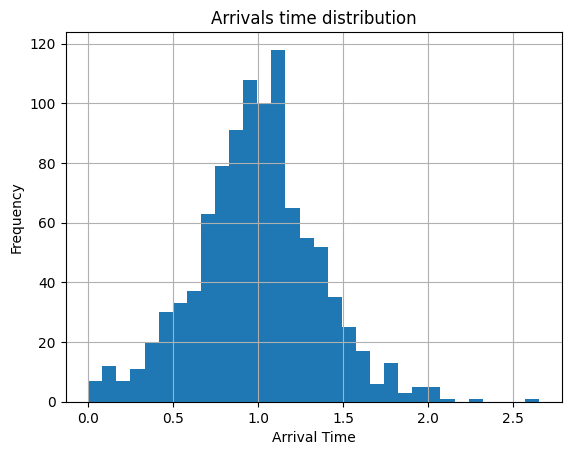

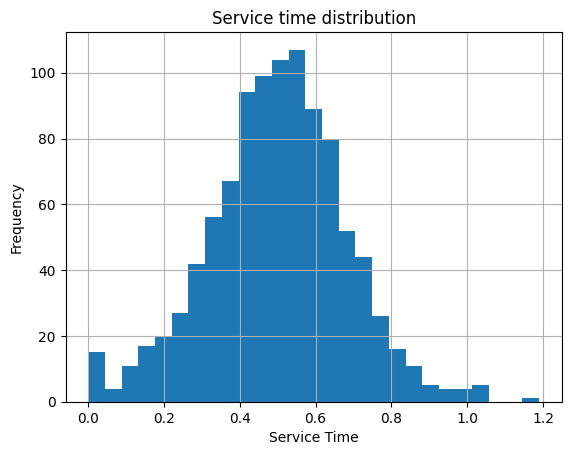

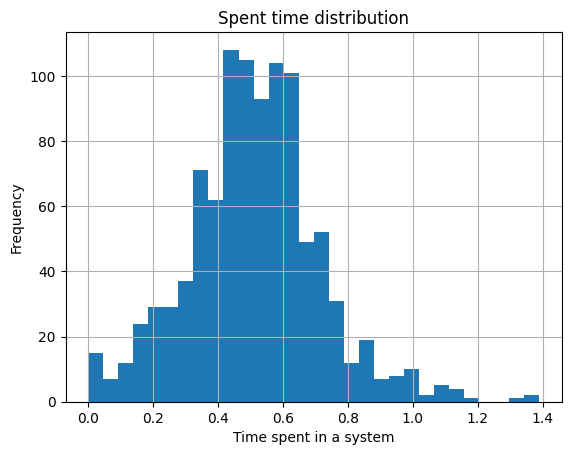

In [15]:
title = 'Unloading of 1000 trucks'
app = Simulation(title, factory)
app.run()
app.show()

New situation with the higher frequency of incoming trucs with the same service characteristics

Unloading of 1000 trucks ver.II
Number of samples taken:  1000
Number of clients generated:  1001
Number of clients served:  1000
Queue report:
Items entered:  1001
Items departed:  1000
Queue current length:  1
Queue max length:  9
Queue mean length:  0.9
Queue mean delay:  0.55
Server utiliation:  0.82
Number of clients served:  1000


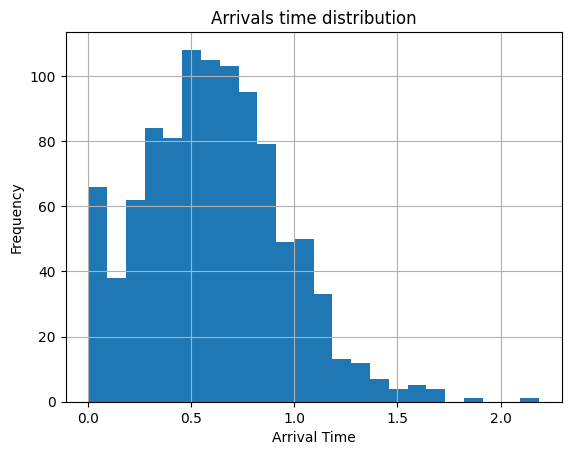

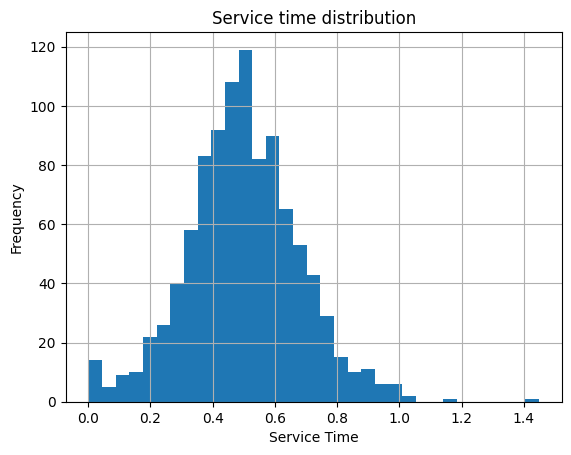

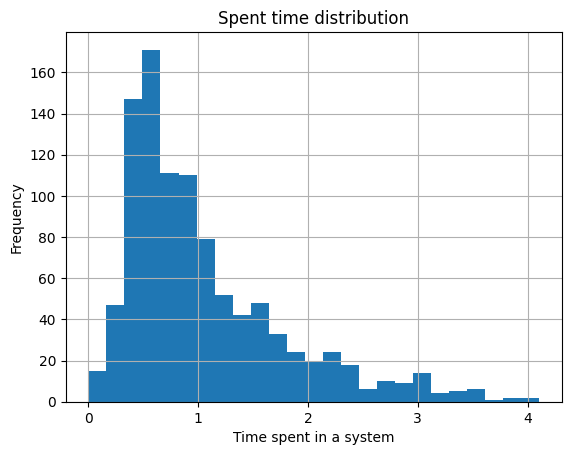

In [16]:
class LogisticFactoryII(GeneratorFactory):
    
    def createArrivals(self):
        return LogisticGenerator(0.6, 0.2, self.number_of_samples, self.seed)
    
    def createServices(self):
        return LogisticGenerator(0.5, 0.1, self.number_of_samples, self.seed)
    
factory_II = LogisticFactoryII(number_of_samples)
    
title = 'Unloading of 1000 trucks ver.II'
app = Simulation(title, factory_II)
app.run()
app.show()

Simulation with enforced service

Unloading of 1000 trucks ver.III
Number of samples taken:  1000
Number of clients generated:  1000
Number of clients served:  1000
Queue report:
Items entered:  1000
Items departed:  1000
Queue current length:  0
Queue max length:  4
Queue mean length:  0.08
Queue mean delay:  0.04
Server utiliation:  0.33
Number of clients served:  1000


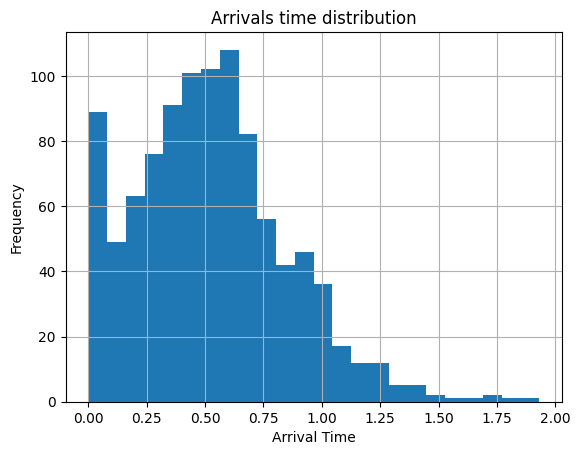

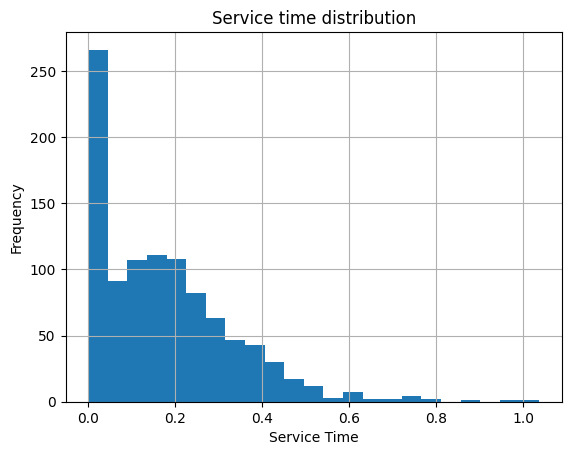

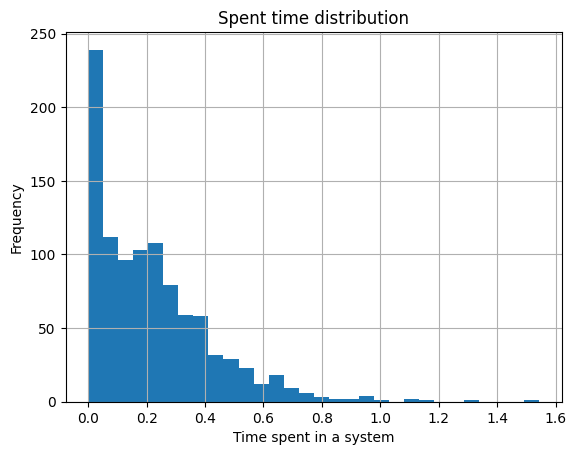

In [17]:
class LogisticFactoryIII(GeneratorFactory):
    
    def createArrivals(self):
        return LogisticGenerator(0.5, 0.2, self.number_of_samples, self.seed)
    
    def createServices(self):
        return LogisticGenerator(0.15, 0.1, self.number_of_samples, self.seed)
    
factory_III = LogisticFactoryIII(number_of_samples)

title = 'Unloading of 1000 trucks ver.III'
app = Simulation(title, factory_III)
app.run()
app.show()

### Simulation experiment
Simulation of the system for the given three types of factories. Every simulation is going to be executed 10 times for every factory and the results are goint to be saved in a table with the two input propability distributions (arrivals and service time) and one output distribution (time spent in a system). 

In [18]:
factories = [factory, factory_II, factory_III]

bin_edges_arrivals = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]
bin_edges_services = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
bin_edges_time_spent = [0, 0.5 , 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Create a DataFrame for the output data
arrival_header = []
for i in range(len(bin_edges_arrivals)-1):
    arrival_header.append(f"{bin_edges_arrivals[i]}-{bin_edges_arrivals[i+1]}")
service_header = []
for i in range(len(bin_edges_services)-1):
    arrival_header.append(f"{bin_edges_services[i]}-{bin_edges_services[i+1]}")
spent_time_header = []
for i in range(len(bin_edges_time_spent)-1):
    arrival_header.append(f"{bin_edges_time_spent[i]}-{bin_edges_time_spent[i+1]}")

header = list(arrival_header+service_header+spent_time_header)
output_data = pd.DataFrame(columns=header, dtype=float)


for f in factories:
    for i in range(10):
        sim = Simulation("Simulation", f)
        sim.run()
        frequencies_arrivals, _ = np.histogram(sim.arrivals.data, bins=bin_edges_arrivals)
        frequencies_services, _ = np.histogram(sim.services.data, bins=bin_edges_services)
        frequencies_time_spent, _ = np.histogram(sim.spent_time, bins=bin_edges_time_spent)
        output = frequencies_arrivals.tolist()+frequencies_services.tolist()+frequencies_time_spent.tolist()
        output = [float(i) for i in output]  # retyped to float
        output_data.loc[len(output_data)] = output
        output_data.to_excel('training_set.xlsx', index=False)

# Transformation to relative frequency
for i in range(0, len(output_data.columns), 10):
    output_data.iloc[:, i:i+10] = output_data.iloc[:, i:i+10].div(output_data.iloc[:, i:i+10].sum(axis=1), axis=0)

output_data.to_excel('training_set.xlsx', index=False)
output_data
        

        



        




,0-0.3,0.3-0.6,0.6-0.9,0.9-1.2,1.2-1.5,1.5-1.8,1.8-2.1,2.1-2.4,2.4-2.7,2.7-3.0,...,0-0.5,0.5-1,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
0,0.021,0.090,0.259,0.342,0.211,0.062,0.011,0.002,0.002,0.000,...,0.489000,0.491000,0.018000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.027,0.102,0.258,0.355,0.182,0.062,0.009,0.004,0.000,0.001,...,0.473000,0.504000,0.023000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.024,0.087,0.246,0.378,0.201,0.050,0.009,0.003,0.002,0.000,...,0.468000,0.513000,0.019000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.027,0.083,0.267,0.355,0.201,0.047,0.014,0.005,0.001,0.000,...,0.506000,0.477000,0.017000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.031,0.096,0.290,0.330,0.190,0.044,0.016,0.002,0.000,0.001,...,0.452000,0.516000,0.029000,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.028,0.093,0.235,0.376,0.192,0.056,0.013,0.006,0.001,0.000,...,0.454000,0.532000,0.012000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,0.037,0.076,0.251,0.361,0.196,0.057,0.017,0.005,0.000,0.000,...,0.439000,0.527000,0.033000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.023,0.079,0.269,0.377,0.186,0.055,0.009,0.002,0.000,0.000,...,0.459000,0.532000,0.009000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
8,0.024,0.087,0.257,0.358,0.201,0.051,0.015,0.006,0.001,0.000,...,0.510000,0.470000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,0.025,0.091,0.270,0.339,0.212,0.054,0.007,0.001,0.001,0.000,...,0.464000,0.520000,0.014000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


### Simulation with the uniform generator

Unloading of 1000 trucks ver.III
Number of samples taken:  1000
Number of clients generated:  1000
Number of clients served:  1000
Queue report:
Items entered:  1000
Items departed:  1000
Queue current length:  0
Queue max length:  6
Queue mean length:  0.46
Queue mean delay:  0.69
Server utiliation:  0.73
Number of clients served:  1000


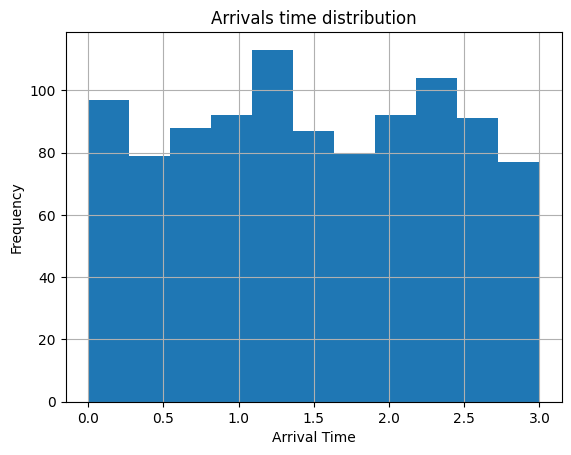

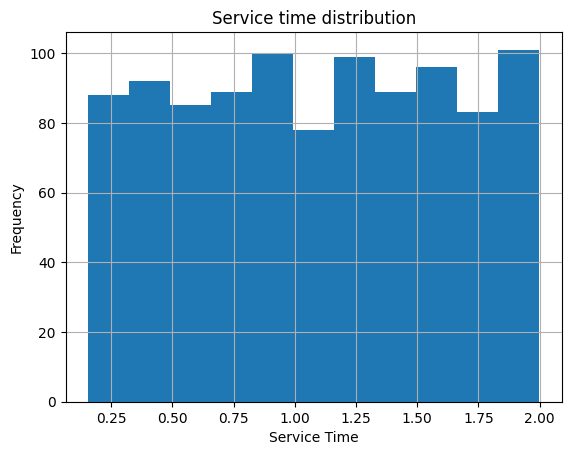

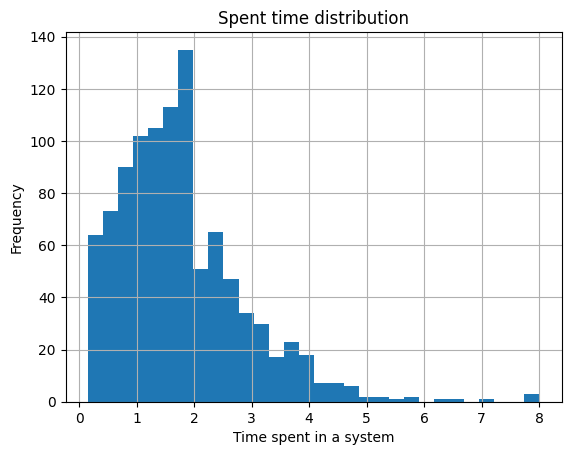

In [22]:
class UniformFactory(GeneratorFactory):
    
    def createArrivals(self):
        return UniformGenerator(0, 3, self.number_of_samples, self.seed)
    
    def createServices(self):
        return UniformGenerator(0.15, 2, self.number_of_samples, self.seed)
    
uniform_factory = UniformFactory(number_of_samples)

title = 'Unloading of 1000 trucks ver.III'
app = Simulation(title, uniform_factory)
app.run()
app.show()

Create inference set for a uniform generator

In [24]:
bin_edges_arrivals = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]
bin_edges_services = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
bin_edges_time_spent = [0, 0.5 , 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Create a DataFrame for the output data
arrival_header = []
for i in range(len(bin_edges_arrivals)-1):
    arrival_header.append(f"{bin_edges_arrivals[i]}-{bin_edges_arrivals[i+1]}")
service_header = []
for i in range(len(bin_edges_services)-1):
    arrival_header.append(f"{bin_edges_services[i]}-{bin_edges_services[i+1]}")
spent_time_header = []
for i in range(len(bin_edges_time_spent)-1):
    arrival_header.append(f"{bin_edges_time_spent[i]}-{bin_edges_time_spent[i+1]}")

header = list(arrival_header+service_header+spent_time_header)
output_data = pd.DataFrame(columns=header, dtype=float)

for i in range(10):
    sim = Simulation("Simulation", uniform_factory)
    sim.run()
    frequencies_arrivals, _ = np.histogram(sim.arrivals.data, bins=bin_edges_arrivals)
    frequencies_services, _ = np.histogram(sim.services.data, bins=bin_edges_services)
    frequencies_time_spent, _ = np.histogram(sim.spent_time, bins=bin_edges_time_spent)
    output = frequencies_arrivals.tolist()+frequencies_services.tolist()+frequencies_time_spent.tolist()
    output = [float(i) for i in output]  # retyped to float
    output_data.loc[len(output_data)] = output

# Transformation to relative frequency
for i in range(0, len(output_data.columns), 10):
    output_data.iloc[:, i:i+10] = output_data.iloc[:, i:i+10].div(output_data.iloc[:, i:i+10].sum(axis=1), axis=0)

output_data.to_excel('uniform_training_set.xlsx', index=False)
output_data

,0-0.3,0.3-0.6,0.6-0.9,0.9-1.2,1.2-1.5,1.5-1.8,1.8-2.1,2.1-2.4,2.4-2.7,2.7-3.0,...,0-0.5,0.5-1,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
0,0.117,0.111,0.099,0.096,0.085,0.082,0.094,0.106,0.098,0.112,...,0.082150,0.167343,0.204868,0.206897,0.115619,0.088235,0.060852,0.035497,0.025355,0.013185
1,0.118,0.090,0.090,0.108,0.099,0.102,0.100,0.090,0.107,0.096,...,0.093333,0.182564,0.206154,0.236923,0.100513,0.064615,0.051282,0.029744,0.018462,0.016410
2,0.095,0.095,0.120,0.101,0.092,0.094,0.089,0.113,0.097,0.104,...,0.089267,0.164718,0.194474,0.255048,0.089267,0.083953,0.040383,0.043571,0.018066,0.021254
3,0.105,0.099,0.098,0.106,0.086,0.090,0.096,0.113,0.108,0.099,...,0.094130,0.159919,0.188259,0.269231,0.104251,0.077935,0.048583,0.042510,0.008097,0.007085
4,0.110,0.109,0.111,0.085,0.110,0.091,0.096,0.093,0.087,0.108,...,0.099897,0.183316,0.215242,0.230690,0.077240,0.092688,0.041195,0.030896,0.014418,0.014418
5,0.127,0.103,0.088,0.103,0.100,0.091,0.088,0.092,0.099,0.109,...,0.102754,0.168432,0.182203,0.217161,0.104873,0.072034,0.048729,0.048729,0.032839,0.022246
6,0.094,0.099,0.087,0.108,0.098,0.112,0.094,0.102,0.115,0.091,...,0.091376,0.181725,0.226899,0.205339,0.096509,0.082136,0.051335,0.028747,0.021561,0.014374
7,0.106,0.096,0.099,0.105,0.099,0.088,0.090,0.092,0.121,0.104,...,0.111801,0.151139,0.196687,0.242236,0.081781,0.079710,0.054865,0.033126,0.028986,0.019669
8,0.110,0.117,0.082,0.110,0.085,0.098,0.075,0.103,0.107,0.113,...,0.089212,0.186722,0.204357,0.214730,0.094398,0.074689,0.060166,0.043568,0.015560,0.016598
9,0.095,0.092,0.097,0.080,0.087,0.109,0.111,0.106,0.123,0.100,...,0.115854,0.183943,0.210366,0.221545,0.098577,0.082317,0.046748,0.025407,0.006098,0.009146
